### Sequence where y_i = xor(x_1, x_2, ... x_i)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as opt
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [65]:
class LSTM(nn.Module):
    def __init__(self, hidden_size, x_size, y_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.x_size = x_size
        self.y_size = y_size
        
        self.Whu = nn.Linear(hidden_size, hidden_size)
        self.Wxu = nn.Linear(x_size, hidden_size)
        self.g1 = nn.Tanh()
        
        self.Wuy = nn.Linear(hidden_size, y_size)
    
    def forward(self, x, h):
        u = self.g1(self.Wxu(x) + self.Whu(h.clone().detach()))
        new_h = h + u
        return self.Wuy(new_h), new_h

In [69]:
def geseq_len(n=10):
    x = torch.rand(n).round()
    summ = 0
    y = []
    for i in range(n):
        summ += x[i].item()
        y.append(summ % 2)
    y = torch.FloatTensor(y)
    return x.view(-1, 1), y.view(-1, 1), n

  0%|          | 0/199999 [00:00<?, ?it/s]

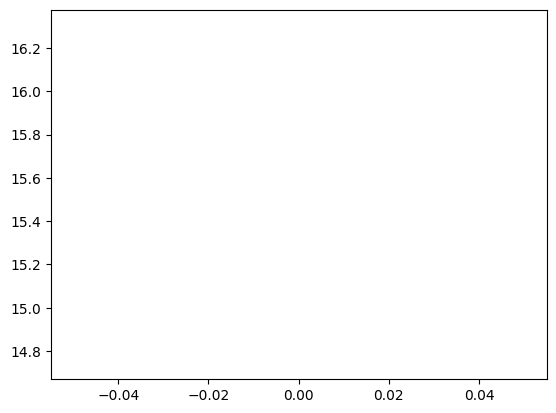

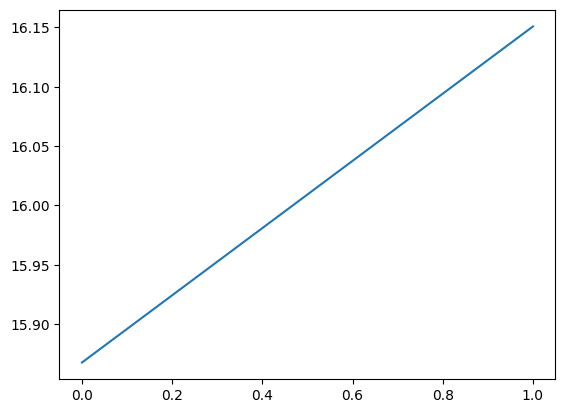

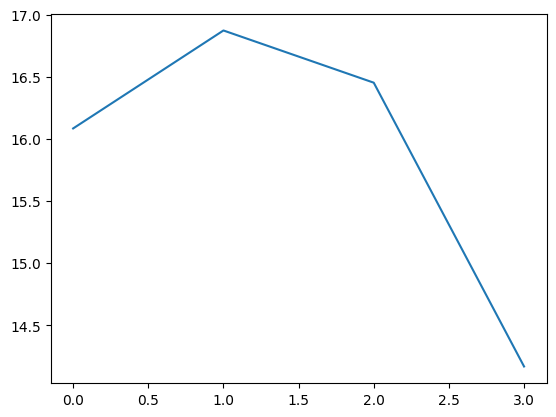

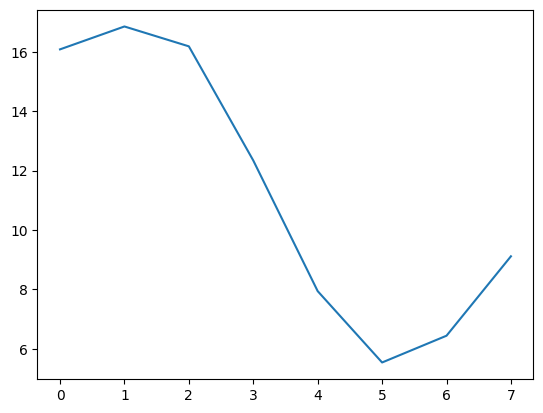

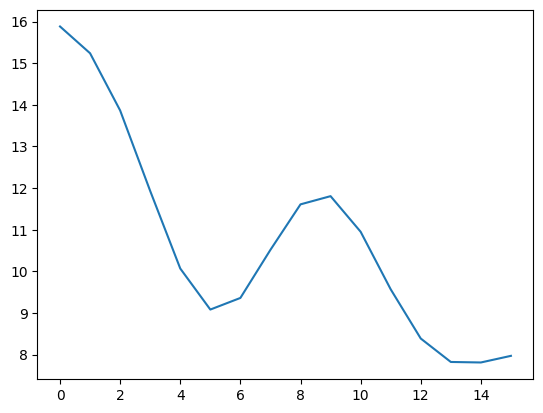

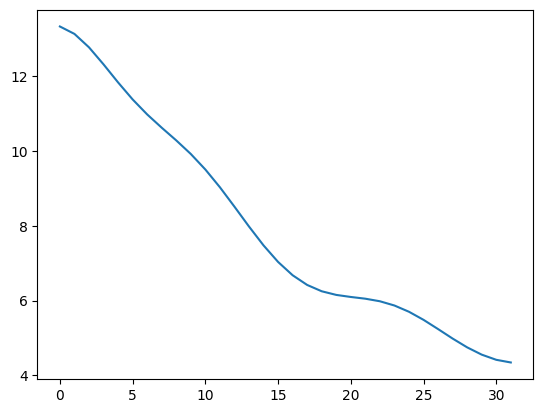

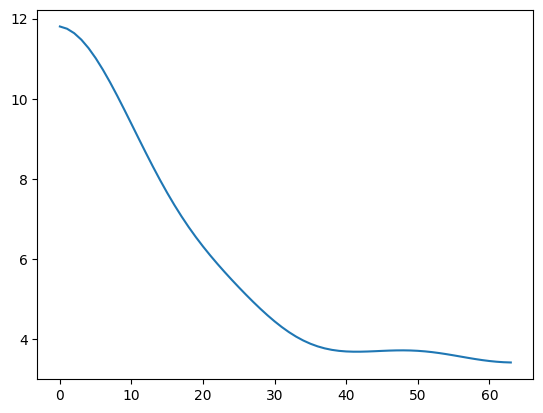

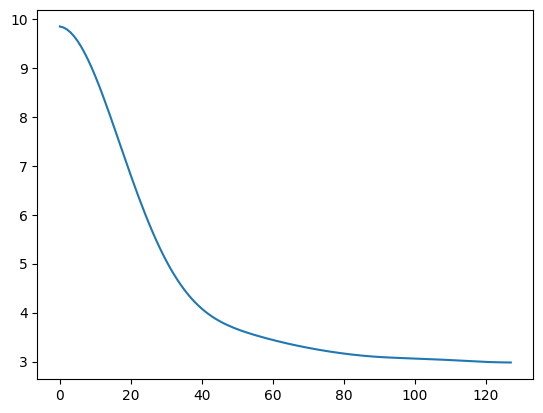

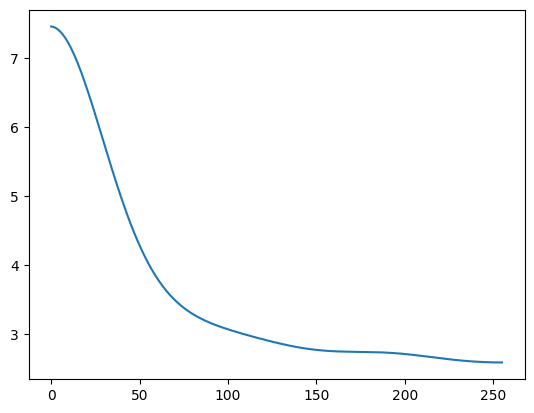

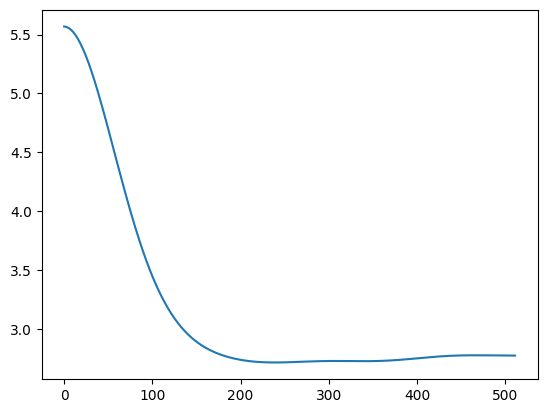

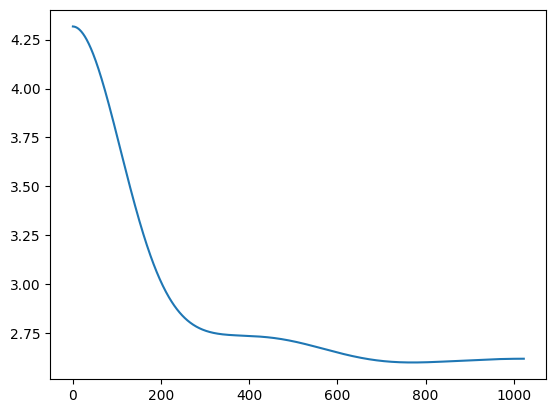

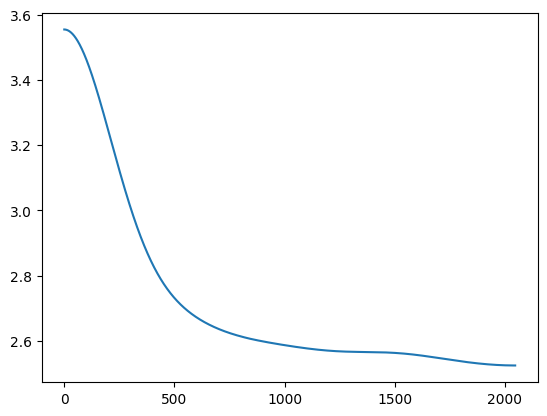

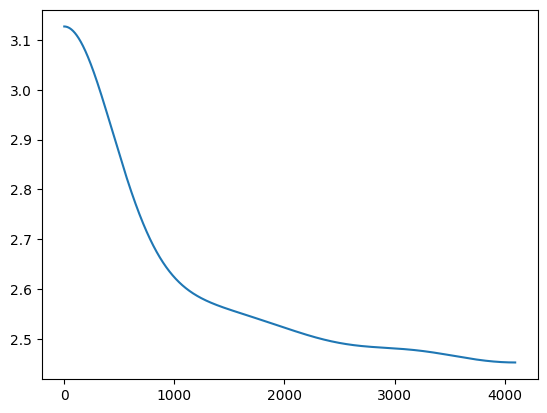

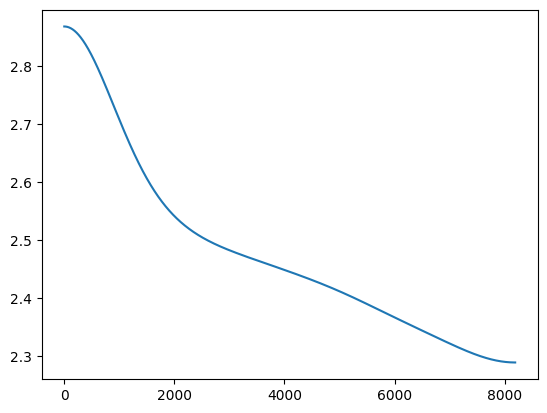

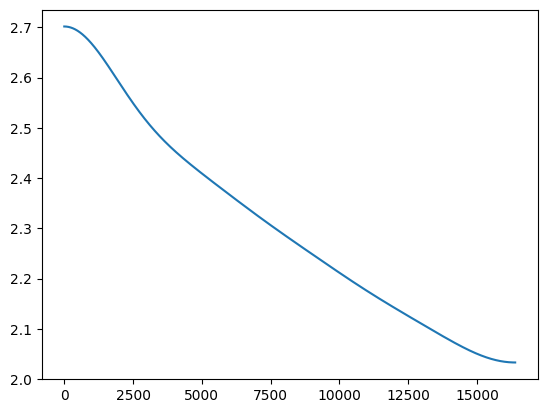

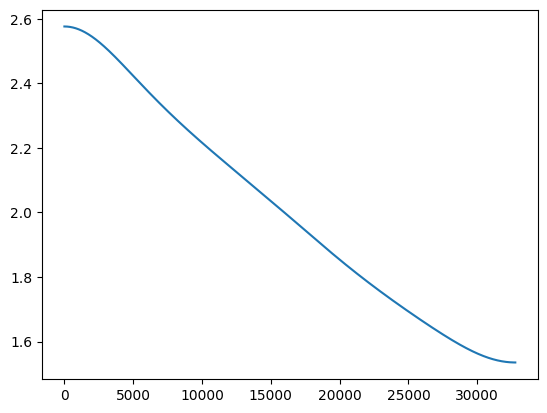

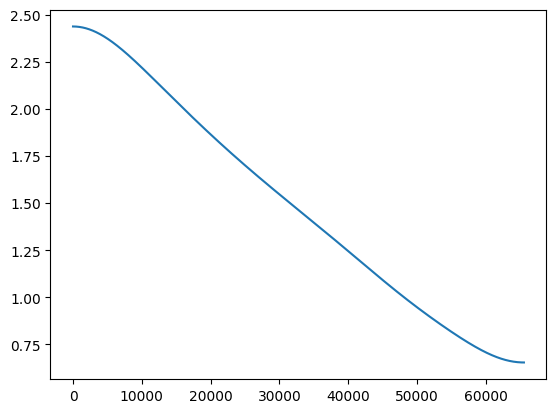

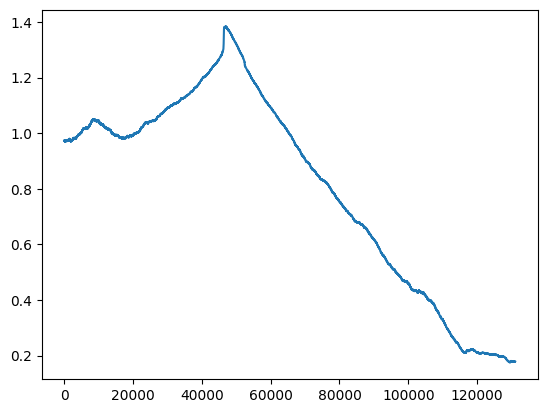

In [173]:
hsize = 20
net = LSTM(hsize, 1, 1)
optimizer = torch.optim.Adam(net.parameters())
losses = []
from scipy.ndimage import gaussian_filter1d

epochs = 200000
for i in tqdm(range(1, epochs)):
    a = torch.zeros(hsize)
    loss = 0
    
    x, y, n = geseq_len(10)
    
    for it in range(n):
        y_pred, a = net(x[it], a)
        loss += F.mse_loss(y_pred, y[it])
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if i & (i - 1) == 0:
        plt.plot(gaussian_filter1d(losses, i // 10 + 1))
        plt.show()

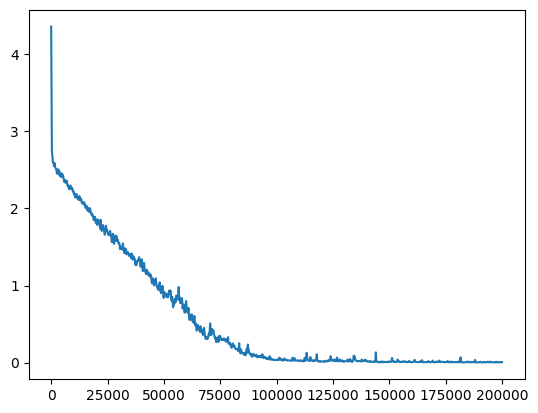

In [174]:
plt.plot(gaussian_filter1d(losses, 100))
plt.show()

In [175]:
x, y, n = geseq_len(20)
a = torch.zeros(hsize)
loss = 0

for it in range(n):
    y_pred, a = net(x[it], a)
    print(y[it].item(), y_pred.item())
    loss += F.mse_loss(y_pred, y[it])
    
print(loss.item())
print(loss.item() / n)

1.0 1.0045709609985352
0.0 0.012614428997039795
1.0 1.0113885402679443
0.0 0.0013089776039123535
1.0 1.0202007293701172
0.0 0.0020812153816223145
0.0 -0.011415302753448486
0.0 -0.029793739318847656
0.0 -0.03559577465057373
0.0 -0.03780549764633179
1.0 0.9682527780532837
1.0 0.9536520838737488
1.0 0.9515919089317322
0.0 -0.005160510540008545
0.0 -0.06380301713943481
1.0 0.9399321675300598
0.0 0.0405307412147522
0.0 -0.02032417058944702
0.0 -0.0772966742515564
1.0 0.880122721195221
0.04004422947764397
0.0020022114738821985
